## P2_G#8
## Maria Giambruno-Fuge, Bethany Lazarus, Sarah Jones

In [1]:
#importing neccessary parts of sklearn to run kmeans clustering
from sklearn.cluster import KMeans

#importing pandas to disect the data
import pandas as pd

#allows splitting of the data set for train and test
from sklearn.model_selection import train_test_split

#importing neccessary parts of sklearn to run agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

In [2]:
#column names for data set
column_names=["sp", "sex", "index", "FL", "RW", "CL", "CW", "BD"]

In [3]:
#importing data from my computer
data = pd.read_csv('australian-crabs.csv', names=column_names)

In [4]:
data.head()

,sp,sex,index,FL,RW,CL,CW,BD
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


In [5]:
#Replaceing sp column blue=0 and orange=1
data['sp'].replace('Blue', 0, inplace=True)
data['sp'].replace('Orange', 1, inplace=True)

In [6]:
#Checking that the sp column was replaced properly
print(data)

     sp     sex  index    FL    RW    CL    CW    BD
0     0    Male      1   8.1   6.7  16.1  19.0   7.0
1     0    Male      2   8.8   7.7  18.1  20.8   7.4
2     0    Male      3   9.2   7.8  19.0  22.4   7.7
3     0    Male      4   9.6   7.9  20.1  23.1   8.2
4     0    Male      5   9.8   8.0  20.3  23.0   8.2
..   ..     ...    ...   ...   ...   ...   ...   ...
195   1  Female     46  21.4  18.0  41.2  46.2  18.7
196   1  Female     47  21.7  17.1  41.7  47.2  19.6
197   1  Female     48  21.9  17.2  42.6  47.4  19.5
198   1  Female     49  22.5  17.2  43.0  48.7  19.8
199   1  Female     50  23.1  20.2  46.2  52.5  21.1

[200 rows x 8 columns]


In [7]:
#Replaceing sex column male=0 and female=1
data['sex'].replace('Male', 0, inplace=True)
data['sex'].replace('Female', 1, inplace=True)

In [8]:
#Checking that the sp column was replaced properly
print(data)

     sp  sex  index    FL    RW    CL    CW    BD
0     0    0      1   8.1   6.7  16.1  19.0   7.0
1     0    0      2   8.8   7.7  18.1  20.8   7.4
2     0    0      3   9.2   7.8  19.0  22.4   7.7
3     0    0      4   9.6   7.9  20.1  23.1   8.2
4     0    0      5   9.8   8.0  20.3  23.0   8.2
..   ..  ...    ...   ...   ...   ...   ...   ...
195   1    1     46  21.4  18.0  41.2  46.2  18.7
196   1    1     47  21.7  17.1  41.7  47.2  19.6
197   1    1     48  21.9  17.2  42.6  47.4  19.5
198   1    1     49  22.5  17.2  43.0  48.7  19.8
199   1    1     50  23.1  20.2  46.2  52.5  21.1

[200 rows x 8 columns]


In [9]:
# Separate features (X)
# X contains only morphological measurements
X= data.drop(columns=['sp', 'sex', 'index'])

# our y values are the ground truth
# ground truth is for later use in ARI calculation
y= data['sp']

In [10]:
#Ensuring the data set (X) only contains morphological measurements
print(X)

       FL    RW    CL    CW    BD
0     8.1   6.7  16.1  19.0   7.0
1     8.8   7.7  18.1  20.8   7.4
2     9.2   7.8  19.0  22.4   7.7
3     9.6   7.9  20.1  23.1   8.2
4     9.8   8.0  20.3  23.0   8.2
..    ...   ...   ...   ...   ...
195  21.4  18.0  41.2  46.2  18.7
196  21.7  17.1  41.7  47.2  19.6
197  21.9  17.2  42.6  47.4  19.5
198  22.5  17.2  43.0  48.7  19.8
199  23.1  20.2  46.2  52.5  21.1

[200 rows x 5 columns]


In [11]:
# Ensuring y contains the ground truth
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: sp, dtype: int64


In [12]:
#building the kmeans clustering model
kmeans= KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [13]:
#printing cluster labels on the training set
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
#building the agglomerative clustering model
agg= AgglomerativeClustering(n_clusters=2)
assignment=agg.fit_predict(X)

In [15]:
#printing cluster labels on the training set
print("Cluster memberships:\n{}".format(agg.labels_))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
# importing sklearn metrics for Adjusted Rand Index
from sklearn.metrics.cluster import adjusted_rand_score

In [17]:
# Ground truth classes: 0 and 1
# 0 for Blue; 1 for Orange
# printing our ground truth classes again for the y variable
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: sp, Length: 200, dtype: int64


In [18]:
# Assigning predicted kmeans clusters to variable
kmeans_predicted = kmeans.labels_

In [19]:
# Assigning predicted agglomerative clusters to variable
agg_predicted = agg.labels_

In [20]:
# Computing Adjusted Rand Index for KMeans
print("Adjusted Rand Index of kmeans: {:.3f}".format(
    adjusted_rand_score(y, kmeans_predicted)))

Adjusted Rand Index of kmeans: 0.028


In [21]:
print("Adjusted Rand Index of agglomerative: {:.3f}".format(
    adjusted_rand_score(y, agg_predicted)))

Adjusted Rand Index of agglomerative: 0.040


### Notebook comment on ARI
Adjusted Rand Index of the KMeans clustering model is 0.028. Adjusted Rand Index of the Agglomerative clustering model is 0.040.
    The clustering algorithm with a better outcome on the crabs dataset using the ARI measure is the agglomerative clustering model. Although not much higher than the kmeans clustering model, the agglomerative clustering model has an ARI closer to 1. Similar to a correlation coefficient, a value closer to 1 indicates a stronger and intuitive cluster relationship in varying shapes and sizes. The ARI takes the ground truth values and predicted cluster labels as parameters for the ARI function, which indicates how well the predicted cluster labels match the predefined ground truth labels/classifications.

In [23]:
#Applying PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

#displaying data shape
print("Original shape: {}".format(str(X.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (200, 5)
Reduced shape: (200, 2)


Text(0, 0.5, 'Second principal component')

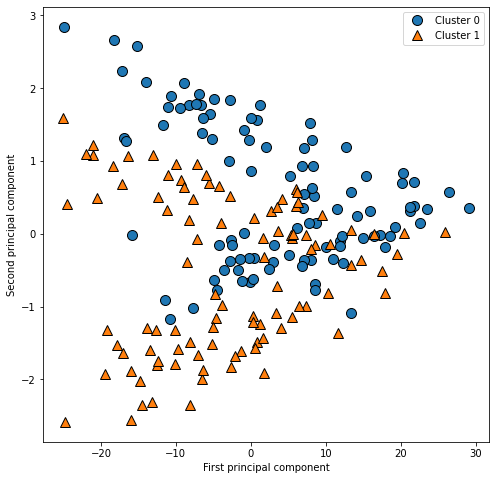

In [24]:
#plot with 2 principal components
from matplotlib import pyplot as plt
import mglearn
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.gca()
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f746981b-2d76-45ff-9dd7-1d3aabdbb75c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>